In [1]:
import nltk

In [2]:
#nltk.download_shell()

In [3]:
## Data from: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#

In [4]:
messages = [line.strip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
len(messages)

5574

In [6]:
for mess_no,mess in enumerate(messages[:10]):
    print(mess_no,mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                       names =['labels','messages'] )

In [9]:
messages.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['messages'].apply(len)

In [13]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

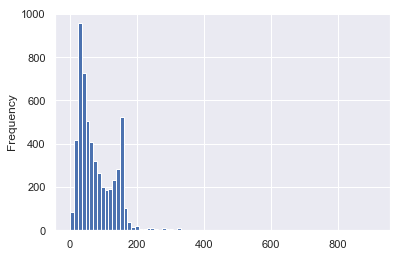

In [15]:
messages['length'].plot.hist(bins=80)
plt.show()

In [16]:
## We observe two peaks

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']==messages['length'].max()]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

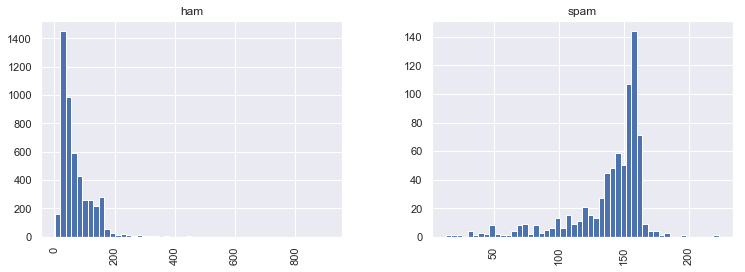

In [19]:
messages.hist(column='length',by='labels',bins=50,figsize=(12,4))
plt.show()

In [20]:
## spam messages are longer

In [21]:
# Data processing: Bag of Words

In [22]:
## Remove stopwords

In [23]:
import string

In [24]:
mess = 'Sample message! Take a look: I have punctuation.'

In [25]:
mess_no_punc = [c for c in mess if c not in string.punctuation]

In [26]:
print(mess_no_punc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'T', 'a', 'k', 'e', ' ', 'a', ' ', 'l', 'o', 'o', 'k', ' ', 'I', ' ', 'h', 'a', 'v', 'e', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


In [27]:
mess_no_punc = ''.join(mess_no_punc)

In [28]:
mess_no_punc

'Sample message Take a look I have punctuation'

In [29]:
from nltk.corpus import stopwords

In [32]:
clean_mess = [word for word in mess_no_punc.split() if word not in stopwords.words('english') ]

In [33]:
clean_mess

['Sample', 'message', 'Take', 'look', 'I', 'punctuation']

In [34]:
def text_process(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_nopunc = [word for word in nopunc.split() if word not in stopwords.words('english') ]
    return clean_nopunc

In [39]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: messages, dtype: object

In [ ]:
# Vectorization

In [ ]:
## We use the bag of words model

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [44]:
len(bow_transformer.vocabulary_)

11617

In [ ]:
## Let us try this on a random message

In [47]:
mess4 = messages['messages'][3]

In [48]:
print(mess4)

U dun say so early hor... U c already then say...


In [49]:
bow4 = bow_transformer.transform([mess4])

In [51]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [52]:
bow4.shape

(1, 11617)

In [ ]:
## retrieving our more repeated words

In [53]:
bow_transformer.get_feature_names()[4221]

'U'

In [54]:
bow_transformer.get_feature_names()[9746]

'say'

In [ ]:
## Now we'll apply this to all our messages

In [55]:
messages_bow = bow_transformer.transform(messages['messages'])

In [56]:
messages_bow.shape ## Size of the matrix

(5572, 11617)

In [57]:
messages_bow.nnz ## non-zero entries

56024

In [116]:
import numpy as np

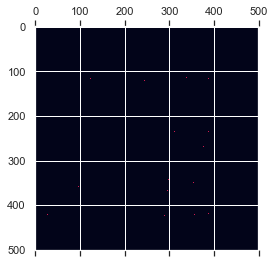

In [123]:
rank = 500
mat = np.zeros((rank, rank))
for row in range(rank-1):
    for column in range(rank-1):
        mat[row,column] = np.asscalar(messages_bow[row,column])
        
plt.matshow(mat)
plt.show()

In [ ]:
# This is a sparse matrix. How sparse? 

In [75]:
sparcity = messages_bow.nnz / (messages_bow.shape[0]*messages_bow.shape[1])
sparcity*100

0.08655038742205227

In [ ]:
## We now TF-IDF normalization of each vector. 

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer

In [78]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
## Let's try this on our random message.

In [79]:
tfidf4 = tfidf_transformer.transform(bow4)

In [80]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [ ]:
## We can check the document frequency of a single word

In [124]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [ ]:
## We now do this on all our messages

In [125]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
## note: should put the data processing into a pipeline

In [128]:
messages_tfidf

<5572x11617 sparse matrix of type '<class 'numpy.float64'>'
	with 56024 stored elements in Compressed Sparse Row format>

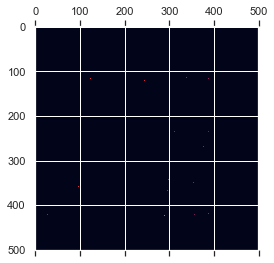

In [127]:
rank = 500
mat = np.zeros((rank, rank))
for row in range(rank-1):
    for column in range(rank-1):
        mat[row,column] = np.asscalar(messages_tfidf[row,column])
        
plt.matshow(mat)
plt.show()

In [ ]:
# We now train our spam classifier with a Naive Bayes method

In [129]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(messages_tfidf,messages['labels'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
spam_detect_model.predict(tfidf4) # which is correct

array(['ham'], dtype='<U4')

In [135]:
messages['labels'][3]

'ham'

In [136]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [ ]:
## Let's do now a train/test split

In [138]:
from sklearn.model_selection import train_test_split

In [145]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['messages'],messages['labels'],
                                                                test_size = 0.3)

In [146]:
len(msg_train),len(label_train)

(3900, 3900)

In [ ]:
## We use Naive Bayes

In [147]:
from sklearn.pipeline import Pipeline

In [154]:
nb_clf = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [155]:
nb_clf.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1146a7268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [161]:
from sklearn.model_selection import cross_val_predict

In [175]:
label_train_pred = cross_val_predict(nb_clf,msg_train,label_train,cv=10)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

In [176]:
print(classification_report(label_train,label_train_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      3388
        spam       1.00      0.69      0.82       512

    accuracy                           0.96      3900
   macro avg       0.98      0.85      0.90      3900
weighted avg       0.96      0.96      0.96      3900



In [177]:
confusion_matrix(label_train,label_train_pred)

array([[3387,    1],
       [ 157,  355]])

In [ ]:
# We now check on the test data

In [178]:
label_test_pred = nb_clf.predict(msg_test)

In [179]:
print(classification_report(label_test,label_test_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1437
        spam       1.00      0.65      0.79       235

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [180]:
confusion_matrix(label_test,label_test_pred)

array([[1437,    0],
       [  82,  153]])

In [ ]:
## Not bad

In [ ]:
## We try a Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
forest_clf = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [206]:
forest_clf.fit(msg_train,label_train)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1146a7268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 t...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0

In [207]:
label_train_pred = cross_val_predict(forest_clf,msg_train,label_train,cv=5)

In [208]:
print(classification_report(label_train,label_train_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      3388
        spam       0.99      0.69      0.82       512

    accuracy                           0.96      3900
   macro avg       0.97      0.85      0.90      3900
weighted avg       0.96      0.96      0.96      3900



In [209]:
confusion_matrix(label_train,label_train_pred)

array([[3386,    2],
       [ 158,  354]])

In [ ]:
# Looks better. We try on test

In [210]:
label_test_pred = forest_clf.predict(msg_test)

In [211]:
print(classification_report(label_test,label_test_pred))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1437
        spam       0.96      0.77      0.85       235

    accuracy                           0.96      1672
   macro avg       0.96      0.88      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [212]:
confusion_matrix(label_test,label_test_pred)

array([[1429,    8],
       [  55,  180]])

In [213]:
# We now play with the hyperparameters

In [221]:
forest_clf=RandomForestClassifier()

In [214]:
from sklearn.model_selection import GridSearchCV

In [231]:
param_grid = [
    {'n_estimators': [1,10,30]},]


In [232]:
grid_search = GridSearchCV(forest_clf,param_grid,cv=5,
                          return_train_score=True)

In [240]:
#grid_search.fit(msg_train,label_train)
## can't do grid search, because pipeline combines model training and data processing

In [ ]:
##### I'll redo everything. The pipeline is now restricted to data processing and won't consider model training

In [237]:
from sklearn.pipeline import Pipeline

In [238]:
data_transform = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer())
])

In [239]:
msg_train_transf = data_transform.fit_transform(msg_train)

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
forest_clf = RandomForestClassifier()

In [243]:
forest_clf.fit(msg_train_transf,label_train)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [245]:
label_train_pred = cross_val_predict(forest_clf,msg_train_transf,label_train,cv=5)

In [246]:
print(classification_report(label_train,label_train_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      3388
        spam       1.00      0.69      0.82       512

    accuracy                           0.96      3900
   macro avg       0.98      0.84      0.90      3900
weighted avg       0.96      0.96      0.96      3900



In [247]:
confusion_matrix(label_train,label_train_pred)

array([[3388,    0],
       [ 159,  353]])

In [ ]:
# We now play with the hyperparameters

In [248]:
forest_clf=RandomForestClassifier()

In [249]:
from sklearn.model_selection import GridSearchCV

In [256]:
param_grid = [
    {'n_estimators': [3,10,30,40,50], 'max_features': [2,4,6,8,9,10]},
]

In [257]:
grid_search = GridSearchCV(forest_clf,param_grid,cv=5,
                          return_train_score=True)

In [258]:
grid_search.fit(msg_train_transf,label_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [259]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 40}

In [260]:
best_clf = grid_search.best_estimator_

In [261]:
msg_test_transf = data_transform.transform(msg_test)

In [262]:
label_test_pred = best_clf.predict(msg_test_transf)

In [263]:
print(classification_report(label_test,label_test_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1437
        spam       1.00      0.69      0.82       235

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [264]:
confusion_matrix(label_test,label_test_pred)

array([[1437,    0],
       [  73,  162]])

In [ ]:
# it's basically the same with default parameters. 